In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# prompt: Write a code to input data in a dataframe from path '/content/drive/MyDrive/colab_data/GSIB_data/Simplified_GSIB_data.xlsx' and sheet name 'Final_with_formula'

import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/colab_data/GSIB_data/Simplified_GSIB_data.xlsx', sheet_name='Final_with_formula',skiprows = 2)
df.head()


,Year_Id,Country,Country_id,Trade Balance ($B),Goods Exports ($B),Goods Imported ($B),Nominal GDP ($B),GDP Per Capita ($),Real GDP Growth (%),"Real GDP, Local Currency ($B)",...,Total Capital ($000),Tier 1 Capital ($000),Tier 1 Common Capital (CET1) ($000),Risk-weighted Assets/ Assets (%).1,Basel III Leverage Ratio (%),Minimum Basel III Leverage Requirement (%),"Minimum TLAC Requirement, as Reported (%)",Minimum MREL Requirement (%),Liquidity Coverage Ratio (%),Net Stable Funding Ratio (%)
0,1990Y,China,CHN,6.96,41.07,34.11,396.31,343.51,3.92,1173.042846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1991Y,China,CHN,6.17,45.99,39.82,409.51,349.82,9.26,1150.063541,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1992Y,China,CHN,1.85,54.27,52.42,493.51,416.88,14.22,1267.876561,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1993Y,China,CHN,-14.34,59.70,74.04,618.79,517.45,13.93,1382.099723,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1994Y,China,CHN,3.46,84.41,80.95,564.34,467.45,12.84,1042.766346,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.columns

Index(['Year_Id', 'Country', 'Country_id', 'Trade Balance ($B)',
       'Goods Exports ($B)', 'Goods Imported ($B)', 'Nominal GDP ($B)',
       'GDP Per Capita ($)', 'Real GDP Growth (%)',
       'Real GDP, Local Currency ($B)', 'Population (M)',
       'Consumer Price Inflation (%)', 'Producer Price Inflation (%)',
       'Exchange Rate, average ', 'Exchange Rate, end ', 'Bank Name',
       'DSIB or GSIB or Both', 'SP_Entity_Id', 'SP_COMPANY_NAME',
       'SP_EXCHANGE_TICKER', 'MI_PRIMARY_INDUSTRY', 'Intangibles/ Equity (%)',
       'Net Customer Loans/ Assets (%)', 'Net Customer Loans/ Deposits (%)',
       'Loan Loss Reserves/ Gross Loans (%)',
       'Risk-weighted Assets/ Assets (%)', 'Total Equity/ Total Assets (%)',
       'Tangible Equity/ Tangible Assets (%)', 'ROAA (%)', 'ROAE (%)',
       'ROACE (%)', 'ROATCE (%)', 'Return on Avg Risk-weighted Assets (%)',
       'Net Interest Margin (%)', 'Net Interest Income/ Avg Assets (%)',
       'Net Operating Expense/ Avg Assets (%)',

In [ ]:
# prompt: import matplotlib as plt

import matplotlib.pyplot as plt


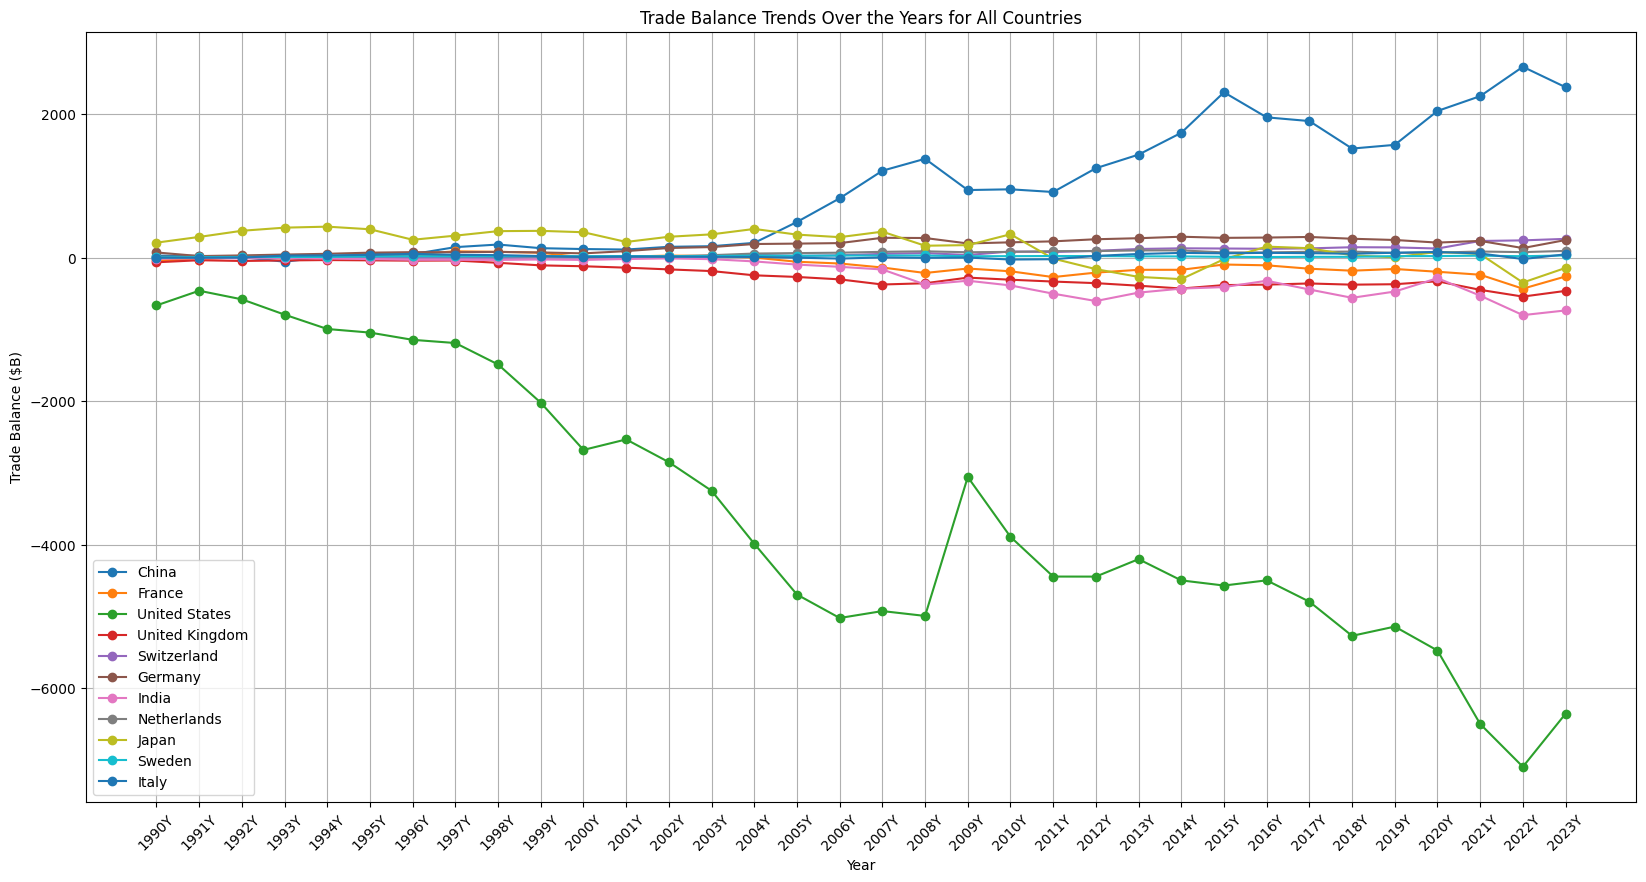

In [ ]:
# Prepare a plot for trade balance trends for all countries
plt.figure(figsize=(20, 10))

# List of unique countries
countries = df['Country'].unique()

# Plot trade balance trends for each country
for country in countries:
    country_trade_balance_data = df[df['Country'] == country]
    country_trade_balance_trends = country_trade_balance_data.groupby('Year_Id')['Trade Balance ($B)'].sum().reset_index()
    plt.plot(country_trade_balance_trends['Year_Id'], country_trade_balance_trends['Trade Balance ($B)'], marker='o', label=country)

# Add title and labels
plt.title('Trade Balance Trends Over the Years for All Countries')
plt.xlabel('Year')
plt.ylabel('Trade Balance ($B)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

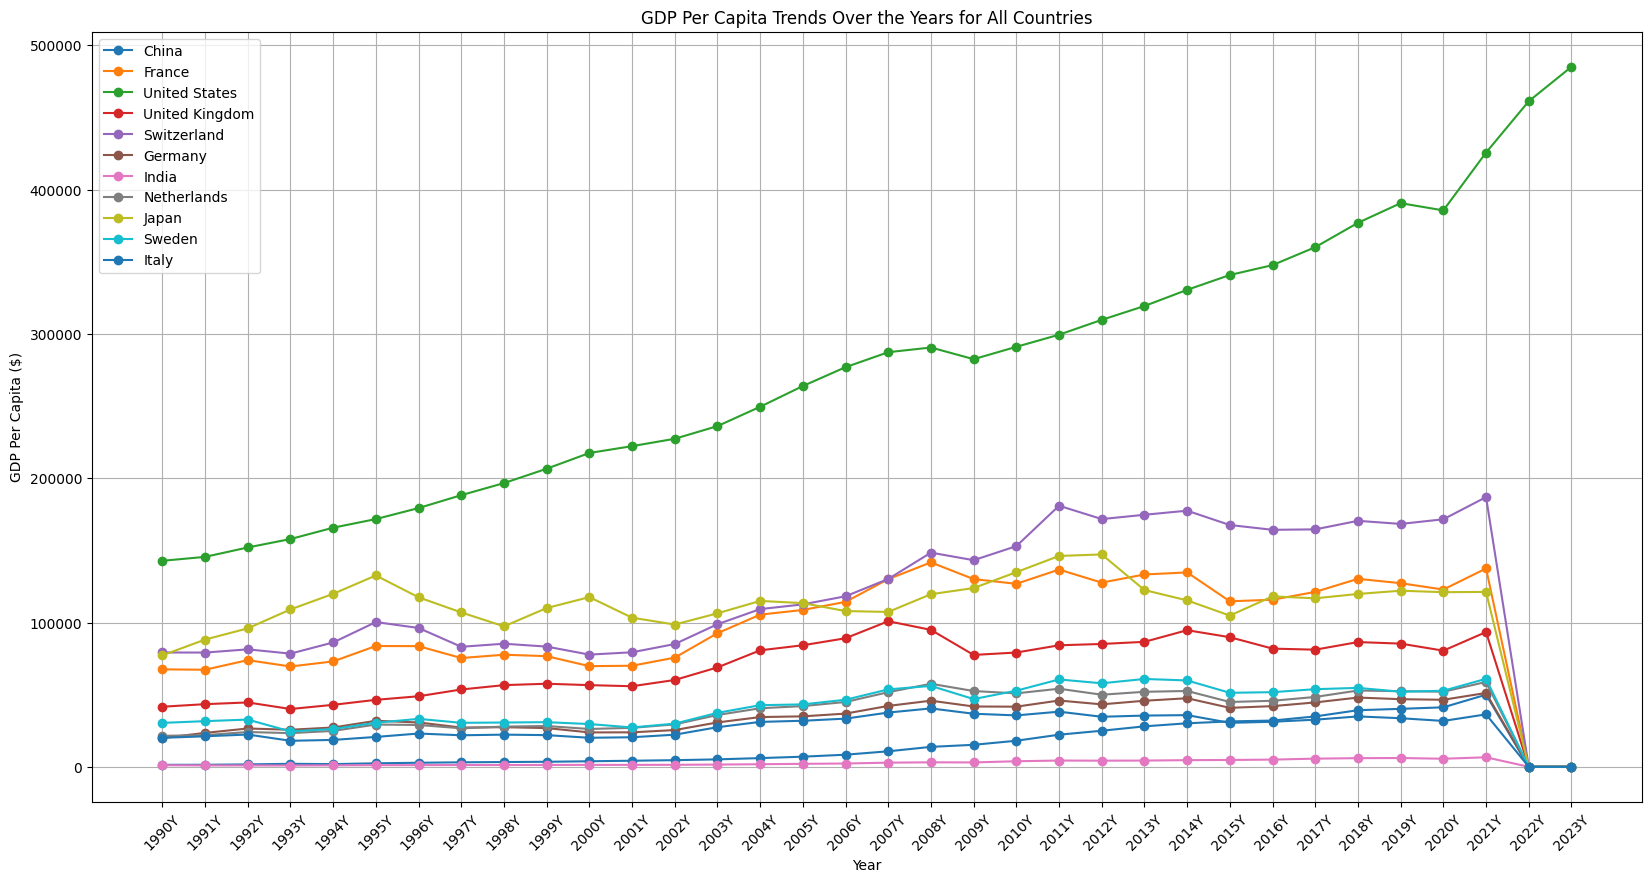

In [ ]:
# Prepare a plot for GDP Per Capita trends for all countries
plt.figure(figsize=(20, 10))

# Plot GDP Per Capita trends for each country
for country in countries:
    country_gdp_per_capita_data = df[df['Country'] == country]
    country_gdp_per_capita_trends = country_gdp_per_capita_data.groupby('Year_Id')['GDP Per Capita ($)'].sum().reset_index()
    plt.plot(country_gdp_per_capita_trends['Year_Id'], country_gdp_per_capita_trends['GDP Per Capita ($)'], marker='o', label=country)

# Add title and labels
plt.title('GDP Per Capita Trends Over the Years for All Countries')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita ($)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


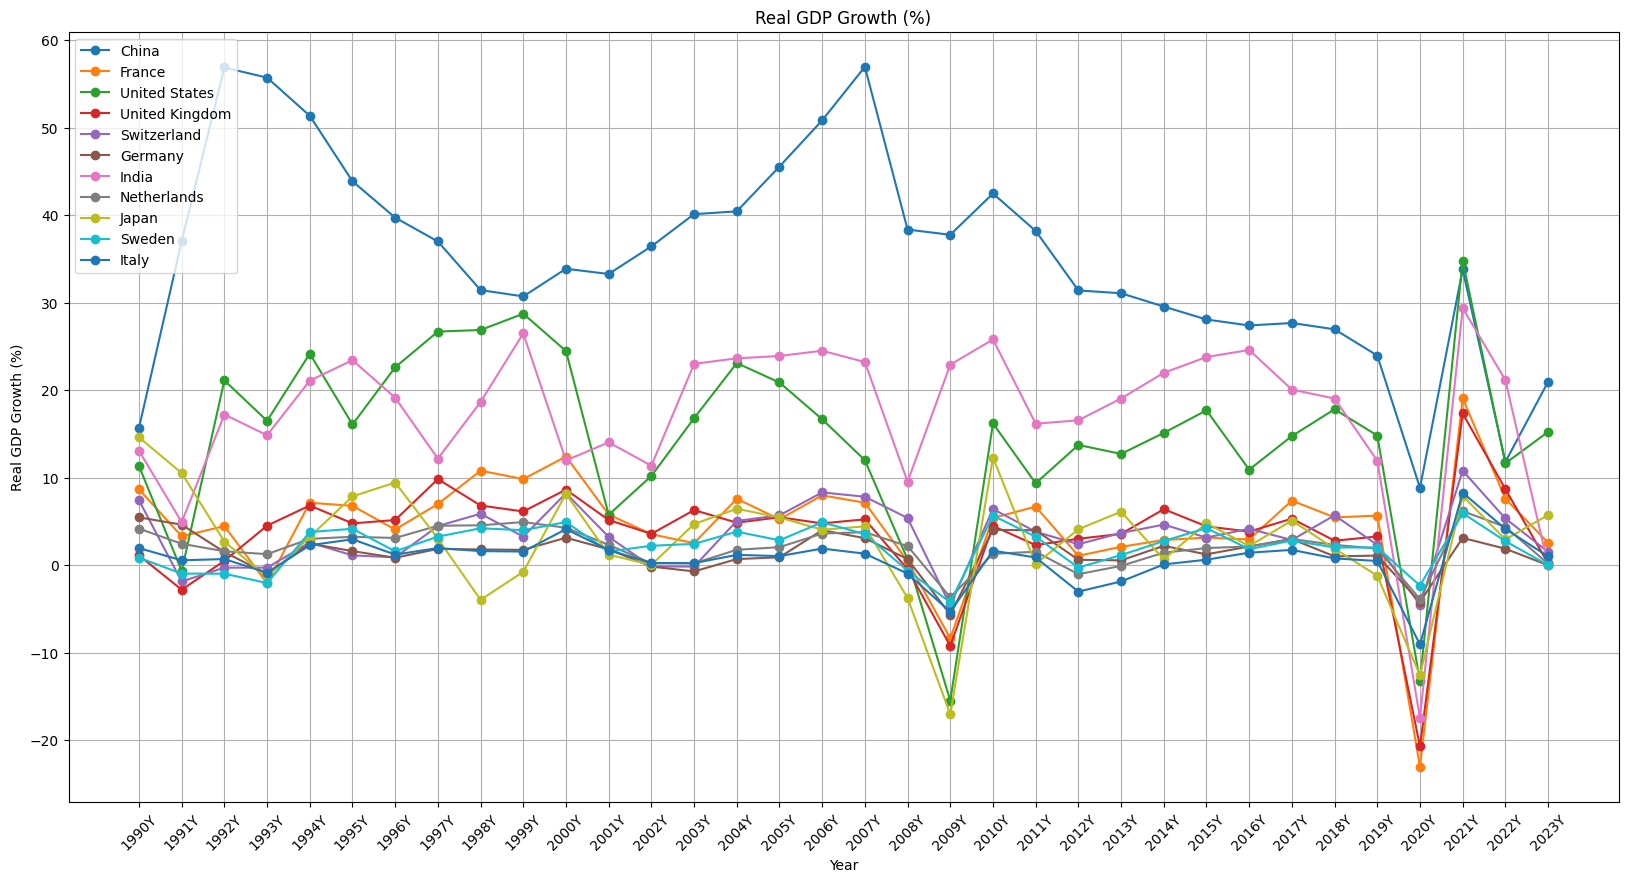

In [ ]:
# Prepare a plot for Real GDP trends for all countries
plt.figure(figsize=(20, 10))

# Plot Real GDP trends for each country
for country in countries:
    country_real_gdp_data = df[df['Country'] == country]
    country_real_gdp_trends = country_real_gdp_data.groupby('Year_Id')['Real GDP Growth (%)'].sum().reset_index()
    plt.plot(country_real_gdp_trends['Year_Id'], country_real_gdp_trends['Real GDP Growth (%)'], marker='o', label=country)

# Add title and labels
plt.title('Real GDP Growth (%)')
plt.xlabel('Year')
plt.ylabel('Real GDP Growth (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


## Analysing Net Interest Margin with Macro economic variables

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the data (assuming 'df' is the dataframe containing the data)
# df = pd.read_excel('your_file.xlsx', sheet_name='Final_with_formula')  # Uncomment and modify if loading from a file

# Select relevant columns for the analysis including Net Interest Margin and macroeconomic variables
columns_for_analysis = [
    'Year_Id', 'Country', 'Consumer Price Inflation (%)', 'Producer Price Inflation (%)',
    'Nominal GDP ($B)', 'Real GDP Growth (%)', 'Exchange Rate, average ',
    'Trade Balance ($B)', 'Goods Exports ($B)', 'Goods Imported ($B)', 'Net Interest Margin (%)'
]

# Filter the data to include only the selected columns and drop rows with missing data
data_for_analysis = df[columns_for_analysis].dropna()

# Convert the necessary columns to the appropriate data types
data_for_analysis['Consumer Price Inflation (%)'] = data_for_analysis['Consumer Price Inflation (%)'].astype(float)
data_for_analysis['Producer Price Inflation (%)'] = data_for_analysis['Producer Price Inflation (%)'].astype(float)
data_for_analysis['Nominal GDP ($B)'] = data_for_analysis['Nominal GDP ($B)'].astype(float)
data_for_analysis['Real GDP Growth (%)'] = data_for_analysis['Real GDP Growth (%)'].astype(float)
data_for_analysis['Exchange Rate, average '] = data_for_analysis['Exchange Rate, average '].astype(float)
data_for_analysis['Trade Balance ($B)'] = data_for_analysis['Trade Balance ($B)'].astype(float)
data_for_analysis['Goods Exports ($B)'] = data_for_analysis['Goods Exports ($B)'].astype(float)
data_for_analysis['Goods Imported ($B)'] = data_for_analysis['Goods Imported ($B)'].astype(float)
data_for_analysis['Net Interest Margin (%)'] = data_for_analysis['Net Interest Margin (%)'].astype(float)

# Prepare the features (X) and target (y)
features = [
    'Consumer Price Inflation (%)', 'Nominal GDP ($B)',
    'Real GDP Growth (%)', 'Exchange Rate, average ',
    'Trade Balance ($B)', 'Goods Exports ($B)', 'Goods Imported ($B)'
]
X = data_for_analysis[features]
y = data_for_analysis['Net Interest Margin (%)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# Feature importance analysis
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", feature_importance_df)


Mean Squared Error (MSE): 1.4682440601340858
R-squared (R²): 0.11209229108231589
Feature Importances:
                         Feature  Importance
6           Goods Imported ($B)    0.293211
1              Nominal GDP ($B)    0.270387
2           Real GDP Growth (%)    0.129744
3       Exchange Rate, average     0.090409
0  Consumer Price Inflation (%)    0.085081
4            Trade Balance ($B)    0.076179
5            Goods Exports ($B)    0.054989


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is the dataframe containing the data

# Select relevant columns for the analysis including Net Interest Margin and macroeconomic variables
columns_for_analysis = [
    'Year_Id', 'Country', 'Consumer Price Inflation (%)', 'Producer Price Inflation (%)',
    'Nominal GDP ($B)', 'Real GDP Growth (%)', 'Exchange Rate, average ',
    'Trade Balance ($B)', 'Goods Exports ($B)', 'Goods Imported ($B)', 'Net Interest Margin (%)'
]

# Filter the data to include only the selected columns and drop rows with missing data
data_for_analysis = df[columns_for_analysis].dropna()

# Convert the necessary columns to the appropriate data types
data_for_analysis['Consumer Price Inflation (%)'] = data_for_analysis['Consumer Price Inflation (%)'].astype(float)
data_for_analysis['Producer Price Inflation (%)'] = data_for_analysis['Producer Price Inflation (%)'].astype(float)
data_for_analysis['Nominal GDP ($B)'] = data_for_analysis['Nominal GDP ($B)'].astype(float)
data_for_analysis['Real GDP Growth (%)'] = data_for_analysis['Real GDP Growth (%)'].astype(float)
data_for_analysis['Exchange Rate, average '] = data_for_analysis['Exchange Rate, average '].astype(float)
data_for_analysis['Trade Balance ($B)'] = data_for_analysis['Trade Balance ($B)'].astype(float)
data_for_analysis['Goods Exports ($B)'] = data_for_analysis['Goods Exports ($B)'].astype(float)
data_for_analysis['Goods Imported ($B)'] = data_for_analysis['Goods Imported ($B)'].astype(float)
data_for_analysis['Net Interest Margin (%)'] = data_for_analysis['Net Interest Margin (%)'].astype(float)

# Prepare the features (X) and target (y)
features = [
    'Consumer Price Inflation (%)', 'Nominal GDP ($B)',
    'Real GDP Growth (%)', 'Exchange Rate, average ',
    'Trade Balance ($B)', 'Goods Exports ($B)', 'Goods Imported ($B)'
]

# Prepare to store R-squared values for each country
r_squared_values = []

# List of unique countries
countries = df['Country'].unique()

# Loop through each country, perform the analysis, and store the R-squared value
for country in countries:
    # Filter data for the current country
    country_data = data_for_analysis[data_for_analysis['Country'] == country]

    if country_data.empty:
        continue

    # Prepare the features (X) and target (y)
    X_country = country_data[features]
    y_country = country_data['Net Interest Margin (%)']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_country, y_country, test_size=0.2, random_state=42)

    # Initialize and train the Random Forest Regressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    r2 = r2_score(y_test, y_pred)

    # Store the R-squared value with the country name
    r_squared_values.append({'Country': country, 'R-squared': r2})

# Convert the results to a DataFrame
r_squared_df = pd.DataFrame(r_squared_values)

# Display the R-squared values for each country
print(r_squared_df)


           Country  R-squared
0            China   0.652283
1           France   0.294748
2    United States  -0.639998
3   United Kingdom  -1.470391
4      Switzerland   0.441400
5          Germany   0.934704
6            India   0.583233
7      Netherlands   0.636956
8            Japan   0.853216
9           Sweden   0.704537
10           Italy   0.698244
